In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

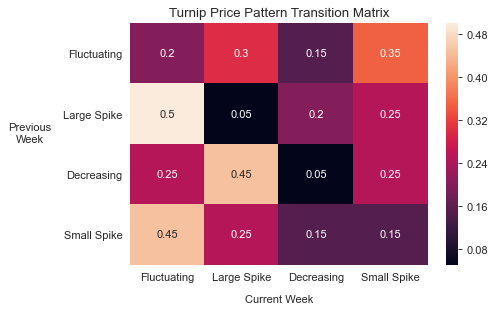

In [65]:
matrix = np.array([[20, 30, 15, 35],
                   [50, 5, 20, 25],
                   [25, 45, 5, 25],
                   [45, 25, 15, 15]])

matrix = matrix / matrix.sum(axis=1)

cases = ['Fluctuating', 'Large Spike', 'Decreasing', 'Small Spike']

def plot(matrix):
    matrix_df = pd.DataFrame(matrix, columns=cases, index=cases)

    plt.figure(dpi=80)
    ax = sns.heatmap(matrix_df, annot=True)
    ax.set_yticklabels(cases, rotation=0)
    ax.set_ylabel('Previous\nWeek',rotation=0, labelpad=30)
    ax.set_xlabel('Current Week', labelpad=10)
    ax.set_title('Turnip Price Pattern Transition Matrix')

    plt.show()
    
    return

plot(matrix)

In [59]:
# initial[0].dot(initial)

In [60]:
# initial.dot(initial)

In [61]:
np.ones(len(cases))/len(cases)

array([0.25, 0.25, 0.25, 0.25])

Step 1


,Fluctuating,Large Spike,Decreasing,Small Spike
0,0.348125,0.2425,0.149375,0.26


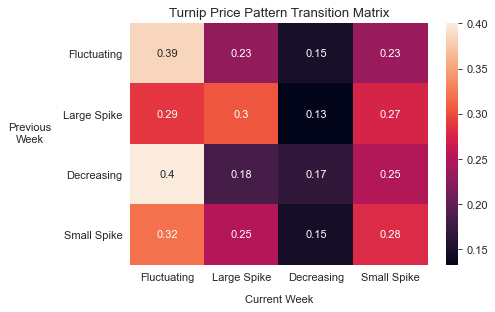

Step 2


,Fluctuating,Large Spike,Decreasing,Small Spike
0,0.345219,0.248781,0.147187,0.258813


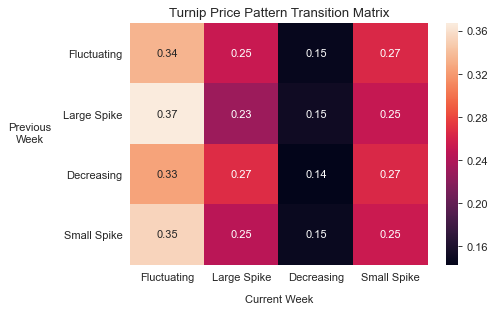

Step 3


,Fluctuating,Large Spike,Decreasing,Small Spike
0,0.346697,0.246942,0.14772,0.258641


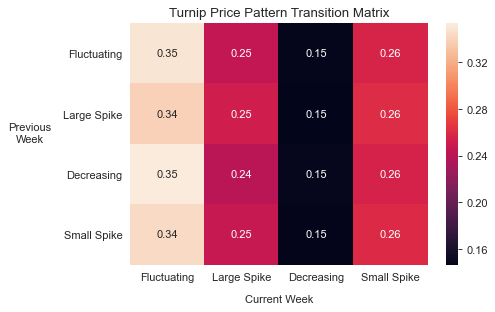

Step 4


,Fluctuating,Large Spike,Decreasing,Small Spike
0,0.346129,0.24749,0.147575,0.258806


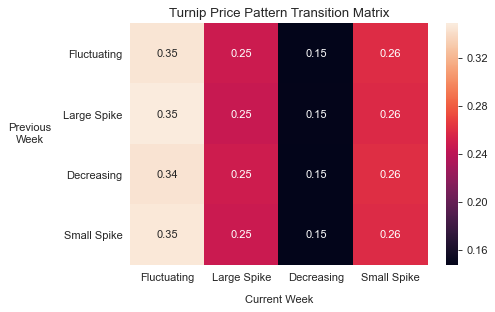

In [67]:
initial = matrix.copy()
current = initial.copy()

for i in range(1,5):
    print(f'Step {i}')
    current = current.dot(initial)
    
    probs = np.ones(len(cases))/len(cases)
    probs = probs.dot(current)
    current_df = pd.DataFrame([probs], columns=cases)
    display(current_df)
    
    plot(current)

In [89]:
for index, row in temp.iterrows():
    print(index)
    print(row)

0
pattern    Fluctuating
p             0.346129
Name: 0, dtype: object
3
pattern    Small Spike
p             0.258806
Name: 3, dtype: object
1
pattern    Large Spike
p              0.24749
Name: 1, dtype: object
2
pattern    Decreasing
p            0.147575
Name: 2, dtype: object


,pattern,p
0,Fluctuating,0.346129
1,Small Spike,0.258806
2,Large Spike,0.247490
3,Decreasing,0.147575


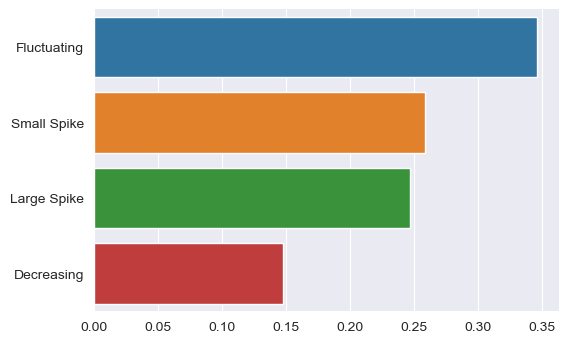

In [129]:
temp = current_df.T
temp = temp.reset_index()
temp.columns = ['pattern', 'p']
temp = temp.sort_values('p', ascending=False).reset_index(drop=True)
display(temp)

plt.figure(dpi=100)
ax = sns.barplot(x='p', y='pattern', data=temp, label="Total")
ax.set_ylabel('')
ax.set_xlabel('')

# ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlim=(0, 24), ylabel="",
#        xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

# ax.set_yticklabels([])
# for index, row in temp.iterrows():
# #     x = (row.p+0.02)/2
#     x = row.p-0.05
#     y = index+0.08
#     ax.text(x, y, '{:.2%}'.format(row.p), color='white', ha="center", size=18)